***BARILLER Halvard*** <br>
***MVA 23/24***

# <center> Computational Statistics 
## <center> Homework 2

In [261]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import scipy.stats as stats
import tqdm

np.random.seed(42)

## Exercise 1: Discrete distributions


Let $n \in \mathbb{N}^*$ and $E = \{x_1,\dots, x_n\}$ a set of n distinct real numbers. Let $(p_i)_{i\in \{1,\dots,n\}}$ a sequence of real
numbers such that:
$$
\forall i \in \{1,\dots,n\}, p_i >0 \text{ and } \sum_{i=1}^n pi =1
$$

### **Question 1 :** *Explain how to generate a random variable $X$ having the discrete distribution on $E$ given by $(p_i)_{i\in \{1,\dots,n\}}$:*

As seen in the previous homework, we can generate a random variable $X$ having the discrete distribution on $X$ given by $(p_i)_{i\in \{1,\dots,n\}}$ by using the inverse transform method. <br>
This method consist in generating a random variable $U$ following a uniform distribution on $[0,1]$ and then applying the inverse of the cumulative distribution function of $X$ to $U$. <br>
We consider $E=\{x_1,\dots,x_n\}$ such that the $x_i$ are ordered ($x_1 < \dots < x_{n}$). We define $F : E \to [0,1]$ the cumulative distribution function defined as follows:
\begin{align*}
\forall x_k \in E, ~F(x_k) = \mathbb{P}(X \leq x_k) = \mathbb{P}(\sqcup_{i=1}^k X = x_i) = \sum_{i=1}^k \mathbb{P}(X=x_i) = \sum_{i=1}^k p_i.
\end{align*}

We can then define the inverse of $F$ as follows:
\begin{align*}
\forall u \in [0,1], ~F^{-1}(u) = \inf\{x_k \in E ~|~ F(x_k) \geq u\}.
\end{align*}
This gives us that:
\begin{align*}
\begin{cases}
F^{-1}(u) = x_1 & \text{ if } u \in \left[0 ~;~ F(x_1) = p_1\right[ \\
& \vdots \\
F^{-1}(u) = x_{k+1} & \text{ if } u \in \left[F(x_k) = \sum_{i=1}^k p_i ~;~ F(x_{k+1}) = \sum_{i=1}^{k+1} p_i \right[ \\
\end{cases}
\end{align*}

### **Question 2 :** *Write (in Python, Julia, Matlab, Octave. . . ) the corresponding algorithm.*

In [262]:
def discrete_distribution(E: np.array, p:np.array, N: int):
    """
    Returns an array containing N random numbers sampled in E following the discrete distribution p.
    Parameters
    ----------
    E : The values of the random variable.
    p : The probabilities of the values of the random variable.
    N : The number of random numbers to generate.
    """
    assert len(E) == len(p), 'E and p must have the same length'
    assert np.isclose(np.sum(p), 1), 'p is not a valid probability distribution'
    F_cdf = np.cumsum(p)
    U = np.random.rand(N)
    samples = np.zeros(N)
    for i, u in enumerate(U):
        samples[i] = E[np.argmax(F_cdf >= u)]
    return samples
    

### **Question 3 :** *Generate a sequence $(Xi)_{i\in \{1,\dots,N\}}$ of i.i.d. random variables having the same distribution as X for large values of N. Compare the empirical distribution to the theoretical distribution of X. (In Python, you can use the function numpy.histogram).*

In [263]:
# Number of samples
N = 100000
dim = 10

In [264]:
# Parameters of the distribution
E = np.arange(dim)
p = np.random.rand(dim)
p /= np.sum(p)

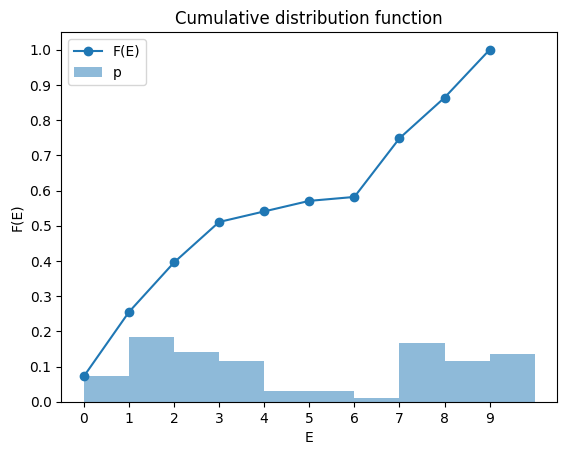

In [265]:
# Cumulative distribution function and probability distribution function
F_cdf = np.cumsum(p)
plt.plot(E, F_cdf, 'o-', label='F(E)')
plt.xlabel('E')
plt.ylabel('F(E)')
plt.title('Cumulative distribution function')
plt.xticks(E)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.bar(E, p, width=1, align='edge', alpha=0.5, label='p')
plt.legend()
plt.show()

In [266]:
# Generation of samples
samples = discrete_distribution(E, p, N)

# Density estimation
empirical = np.histogram(samples, bins=np.arange(dim+1), density=True)[0]
assert np.isclose(np.sum(empirical), 1), 'empirical is not a valid probability distribution'

/var/folders/0m/07y4vn414bng8jcy4nv9qj900000gp/T/ipykernel_34512/1337328882.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(E)


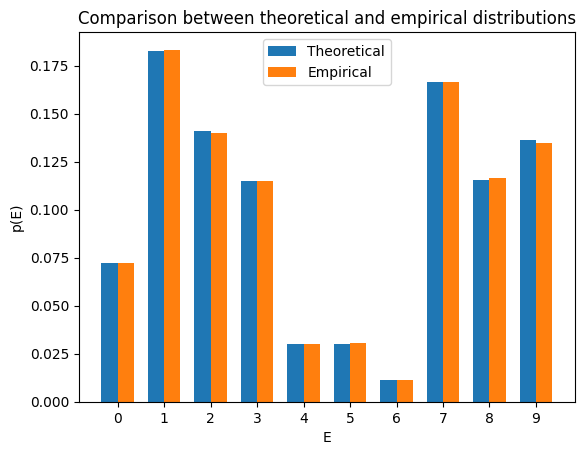

In [267]:
width = 0.35

fig, ax = plt.subplots()
ax.bar(E, p, width=width, align='edge', label='Theoretical')
ax.bar(E+width, empirical, width=width, align='edge', label='Empirical')
ax.set_xlabel('E')
ax.set_ylabel('p(E)')
ax.set_title('Comparison between theoretical and empirical distributions')
ax.set_xticklabels(E)
ax.set_xticks(E+width)
ax.legend()
plt.show()

/var/folders/0m/07y4vn414bng8jcy4nv9qj900000gp/T/ipykernel_34512/228702335.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(E)


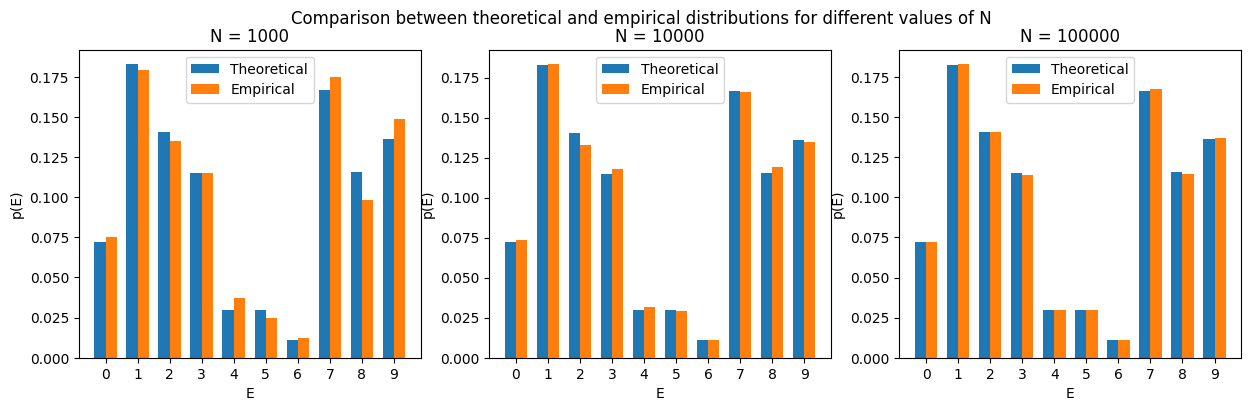

In [268]:
N = [1000, 10000, 100000]

figure, ax = plt.subplots(1, len(N), figsize=(15, 4))

for i, n in enumerate(N):
    samples = discrete_distribution(E, p, n)
    empirical = np.histogram(samples, bins=np.arange(dim+1), density=True)[0]
    ax[i].bar(E, p, width=width, align='edge', label='Theoretical')
    ax[i].bar(E+width, empirical, width=width, align='edge', label='Empirical')
    ax[i].set_xlabel('E')
    ax[i].set_ylabel('p(E)')
    ax[i].set_title('N = {}'.format(n))
    ax[i].set_xticklabels(E)
    ax[i].set_xticks(E+width)
    ax[i].legend()
figure.suptitle('Comparison between theoretical and empirical distributions for different values of N')
plt.show()


As N increases, the discrepancies become less and less noticeable: the empirical distribution converges to the theoretical distribution of X over E (as expected with law of large numbers).

## Exercise 2: Gaussian Mixture Model and the EM algorithm

### **Question 1 :** *Identify the parameters, denoted $\theta$, of the model and write down the likelihood of $\theta$ given the outcomes $(x_i)_{i\in\{1,\dots,n\}}$ of the i.i.d n-sample $(X_i)_{i\in\{1,\dots,n\}}$, i.e the p.d.f $\mathcal{L}(x_1,...,x_n;θ) = \prod_{i=1}^n f_θ(x_i).$*

The parameters of the models are contained in the following vector: <br>
$$ 
\theta = (\alpha_1, \dots, \alpha_m, \mu_1, \dots, \mu_m, \Sigma_1, \dots, \Sigma_m) 
$$.
Considering a sample of $n$ i.i.d observations $(X_i)_{i\in\{1,\dots,n\}}$, the likelihood of $\theta$ is given by: <br>
\begin{align*}
\mathcal{L}(x_1,...,x_n;θ) = & \prod_{i=1}^n f_\theta(x_i) \\
= & \prod_{i=1}^n \sum_{j=1}^m f_θ(x_i|z_i = j) f_\theta(z_i = j) \\
= & \prod_{i=1}^n \sum_{j=1}^m \alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j) 
\end{align*}, 
where $ \mathcal{N}(x_i; \mu_j, \Sigma_j) $ is the density of a multivariate Gaussian distribution with mean $\mu_j$ and covariance matrix $\Sigma_j$:
$$
\mathcal{N}(x_i; \mu_j, \Sigma_j) = \frac{1}{(2\pi)^{d/2}|\Sigma_j|^{1/2}} \exp \left( -\frac{1}{2} (x_i - \mu_j)^T \Sigma_j^{-1} (x_i - \mu_j) \right)
$$
Finally, the log-likelihood of $\theta$ is given by:
$$
\ell(x_1,...,x_n;θ) = \sum_{i=1}^n \log \left( \sum_{j=1}^m \alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j) \right)
$$

### **Question 2 :** *Sample a set of observation according to a Gaussian mixture law, with the parameters of your choice. Use the hierarchical model and the first exercise.*

In [269]:
# Number of clusters
m = 3
# Number of samples
N = 1000
# Dimension of the data
dim = 2

In [270]:
def gaussian_mixture_law(N, m, dim = 2, isotropic=False, diagonal=False, equibalanced_clusters=False):
    """
    Returns N samples drawn from a gaussian mixture law with m clusters.
    Parameters
    ----------
    N : The number of samples to generate.
    m : The number of clusters.
    dim : The dimension of the samples.
    isotropic : If True, the Gaussians are isotropic.
    diagonal : If True, the Gaussians are diagonal.
    equibalanced_clusters : If True, the distribution of the clusters is uniform.
    """
    # Probabilities of the clusters
    if equibalanced_clusters:
        prob_clusters = np.ones(m)/m
    if not equibalanced_clusters:
        prob_clusters = np.random.rand(m)
        prob_clusters /= np.sum(prob_clusters)

    # Parameters of the clusters
    mu = np.random.rand(m, dim)*10

    if isotropic:
        sigma = np.array([np.eye(dim)* np.random.rand()*10 for _ in range(m)])
    if diagonal:
        sigma = np.array([np.eye(dim)* np.diag(np.random.rand(dim)) for _ in range(m)]) 
    if not isotropic and not diagonal:
        sigma = np.random.rand(m, dim, dim)
        sigma = np.array([np.dot(s, s.T) for s in sigma])
        # sigma = np.array([np.tril(np.random.rand(dim, dim)) for _ in range(m)]) 
        # sigma = np.array([np.dot(s, s.T) for s in sigma])

    # Cluster sampling
    clusters = discrete_distribution(np.arange(m), prob_clusters, N)

    # Generation of samples
    samples = np.zeros((N, dim))
    for i, cluster in enumerate(clusters):
        samples[i] = np.random.multivariate_normal(mu[int(cluster)], sigma[int(cluster)])

    return samples, clusters, mu, sigma, prob_clusters


In [271]:
def plot_gaussian(samples, clusters, mu, sigma, contours=True):
    """
    Plots the contours of the gaussians with parameters mu and sigma.
    Parameters
    ----------
    samples : The samples.
    clusters : The clusters of the samples.
    mu : The means of the gaussians.
    sigma : The covariance matrices of the gaussians.
    contours : If True, plots the contours of the gaussians.
    """
    assert len(mu) == len(sigma), 'mu and sigma must have the same length'
    assert samples.shape[1] == mu.shape[1], 'samples and mu must have the same dimension'
    assert samples.shape[1] == sigma.shape[1], 'samples and sigma must have the same dimension'
    assert sigma.shape[1] == sigma.shape[2], 'sigma must be a square matrix'
    assert samples.shape[1] == 2, 'samples must be 2-dimensional'

    if not contours:
        plt.scatter(mu[:,0], mu[:,1], c='red', s=100, alpha=1)
        plt.scatter(samples[:,0], samples[:,1], c=clusters, alpha=0.1)

    if contours:
        for i in range(len(mu)):
            # Samples and means of each cluster
            x, y = samples[clusters == i].T
            plt.plot(x, y, 'o', alpha=0.5)
            plt.plot(mu[i][0], mu[i][1], 'x', color='red')

            # Contour plot of each cluster
            x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
            z_grid = np.empty(x_grid.shape)
            for j in range(x_grid.shape[0]):
                for k in range(x_grid.shape[1]):
                    x = np.array([x_grid[j, k], y_grid[j, k]])
                    z_grid[j, k] = np.exp(-0.5 * (x - mu[i]).T @ np.linalg.inv(sigma[i]) @ (x - mu[i])) / (2 * np.pi * np.sqrt(np.linalg.det(sigma[i])))
            plt.contour(x_grid, y_grid, z_grid, levels=3, colors='black', alpha=1, linewidths=0.5)

    plt.xlabel('x')
    plt.ylabel('y')
    # Set the axis limits depending on the samples with some margin scaled to the size of the samples
    plt.xlim(min(samples[:,0]) - 0.1 * (max(samples[:,0]) - min(samples[:,0])), max(samples[:,0]) + 0.1 * (max(samples[:,0]) - min(samples[:,0])))
    plt.ylim(min(samples[:,1]) - 0.1 * (max(samples[:,1]) - min(samples[:,1])), max(samples[:,1]) + 0.1 * (max(samples[:,1]) - min(samples[:,1])))

    plt.title('Gaussian mixture')
    plt.show()

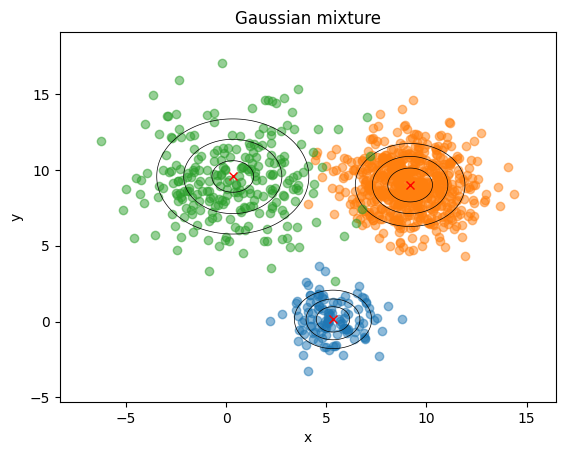

In [272]:
np.random.seed(12)
samples, assigned_clusters, mu, sigma, prob_clusters = gaussian_mixture_law(N, m, dim=dim, isotropic=True, equibalanced_clusters=False)  
plot_gaussian(samples, assigned_clusters, mu, sigma, contours=True)

In [273]:
for i in range(m):
    print('Cluster {} :'.format(i))
    print('mu = {}'.format(mu[i]))
    print('sigma = {}'.format(sigma[i]))
    print('prob = {}'.format(prob_clusters[i]))
    print('')

Cluster 0 :
mu = [5.33739393 0.14574962]
sigma = [[1.37209321 0.        ]
 [0.         1.37209321]]
prob = 0.13318287053837988

Cluster 1 :
mu = [9.18747008 9.00714854]
sigma = [[2.83828353 0.        ]
 [0.         2.83828353]]
prob = 0.6393365703535748

Cluster 2 :
mu = [0.33421428 9.56949336]
sigma = [[6.06083184 0.        ]
 [0.         6.06083184]]
prob = 0.22748055910804524



### **Question 3 :** *Implement the EM algorithm in order to estimate the parameters of this model from your observations and plot the log-likelihood over the number of iterations of the algorithm.*

We can write the complete log-likelihood of the problem as:
\begin{align*}
\ell((x_i,z_i)_i|\theta) = & \sum_{i=1}^n \log \left( f_\theta(x_i,z_i) \right) \\
= & \sum_{i=1}^n \log \left( f_\theta(x_i|z_i) f_\theta(z_i) \right) \\
= & \sum_{i=1}^n \log (f_\theta(x_i|z_i)) + \log (f_\theta(z_i)) \\
= & \sum_{i=1}^n  \sum_{j=1}^m z_i^j \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \\
\end{align*}
where $z_i^j \in \{0, 1\}$ with $z_i^j = 1$ if $x_i$ belongs to the $j$-th cluster ($z_i = j$) and $0$ otherwise. <br>

Using Bayes' formula, we can write the posterior distribution of $z_i$ given $x_i$ as:
\begin{align*}
f_\theta(z_i = j|x_i) ={} & \frac{f_\theta(x_i|z_i = j) f_\theta(z_i = j)}{f_\theta(x_i)} \\
={} & \frac{f_\theta(x_i|z_i = j) f_\theta(z_i = j)}{\sum_{j=1}^m f_\theta(x_i|z_i = j) f_\theta(z_i = j)} \\
={} & \frac{\alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j)}{\sum_{j=1}^m \alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j)} \\
={} & \tau_i^j(\theta)
\end{align*}

Before implementing the algorithm, we proceed to explicit the E-step and the M-step. <br>

**E-step:** <br>
Using the previous expressions, we can now write the expectation of the complete log-likelihood with respect to the conditional distribution of $Z$ given $X$:
\begin{align*}
\mathbb{E}_{Z|X = (x_i)_i, \theta}[\ell((x_i,Z_i)_i|\theta)] = & \sum_{i=1}^n \sum_{j=1}^m \mathbb{E}_{Z_i|X=x_i, \theta}\left( Z_i^j \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \right) \\
={} & \sum_{i=1}^n \sum_{j=1}^m \mathbb{P}_{Z_i|X=x_i,\theta}(Z_i^j = 1)  \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \\
={} & \sum_{i=1}^n \sum_{j=1}^m \mathbb{P}_{Z_i|X=x_i,\theta}(Z_i = j)  \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \\
={} & \sum_{i=1}^n \sum_{j=1}^m \tau_i^j(\theta)  \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \\
\end{align*}

The E-step consists in computing the posterior probability of the latent variable $z_i$ given the observation $x_i$ and the current estimate of the parameters $\theta^{(t)}$. As seen above, we have:<br>
$$
\mathbb{P}(z_i = j | x_i, \theta^{(t)}) = \frac{\mathbb{P}(z_i = j, x_i | \theta^{(t)})}{\mathbb{P}(x_i | \theta^{(t)})}
= \frac{\alpha_j^{(t)} \mathcal{N}(x_i; \mu_j^{(t)}, \Sigma_j^{(t)})}{\sum_{k=1}^m \alpha_k^{(t)} \mathcal{N}(x_i; \mu_k^{(t)}, \Sigma_k^{(t)})}
= \tau_i^j(\theta^{(t)})
$$
At the end of the E-step, the posterior probabilities are fixed: we can remove the dependency on $\theta^{(t)}$ and write $\tau_i^j$ instead of $\tau_i^j(\theta^{(t)})$. <br>

**M-step:** <br>
The M-step consists in maximizing the expected complete log-likelihood of the data given the latent variables $z_i$ and the current estimate of the parameters $\theta^{(t)}$. <br>
\begin{align*}
\theta^{(t+1)} & = \underset{\theta}{\text{argmax}} \mathbb{E}_{Z|x, \theta^{(t)}} \left[ \sum_{i=1}^n  \sum_{j=1}^m Z_i^j \left( \log \left(\mathcal{N}(x_i; \mu_j, \Sigma_j) \right) + \log (\alpha_j) \right) \right] \\
& = \underset{\theta}{\text{argmax}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left( \log \alpha_j^{(t)} + \log \mathcal{N}(x_i; \mu_j^{(t)}, \Sigma_j^{(t)}) \right) \\
& = \underset{\theta}{\text{argmax}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left( \log \alpha_j^{(t)} - \frac{d}{2} \log(2\pi) - \frac{1}{2} \log |\Sigma_j^{(t)}| - \frac{1}{2} (x_i - \mu_j^{(t)})^T (\Sigma_j^{(t)})^{-1} (x_i - \mu_j^{(t)}) \right) \\
& = \underset{\theta}{\text{argmax}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left( \log \alpha_j^{(t)} - \frac{1}{2} \log |\Sigma_j^{(t)}| - \frac{1}{2} (x_i - \mu_j^{(t)})^T (\Sigma_j^{(t)})^{-1} (x_i - \mu_j^{(t)}) \right)
\end{align*}


We can rewrite this as the following optimization problem:
\begin{align*}
(P) ~ \underset{\theta}{\text{min}} ~F_x(\theta) & = \underset{\theta}{\text{min}} - \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left( \log \alpha_j - \frac{1}{2} \log |\Sigma_j| - \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right) \\
& = \underset{\alpha}{\text{min}} - \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \log \alpha_j + \underset{\mu,\Sigma}{\text{min}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j\left(\frac{1}{2} \log |\Sigma_j|+ \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right) \\
& \text{subject to} 
\begin{cases}
\sum_{j=1}^m \alpha_j = 1 \\
\alpha_j \geq 0, ~ \forall j \in \{1, \dots, m\} \\
\Sigma_j \succ 0, ~ \forall j \in \{1, \dots, m\} \\
\mu_j \in \mathbb{R}^d, ~ \forall j \in \{1, \dots, m\}
\end{cases}
\end{align*}

We can separate the problem into two sub-problems as the parameters in $\theta$ are uncoupled. 
- **Optimization with respect to $\alpha$:** <br>
We begin by optimizing with respect to $\alpha$:
\begin{align*}
\underset{\alpha}{\text{min}} ~F_x(\alpha) & = \underset{\alpha}{\text{min}} - \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \log \alpha_j,~
\text{ subject to }
\begin{cases}
\sum_{j=1}^m \alpha_j = 1 \\
\alpha_j \geq 0, ~ \forall j \in \{1, \dots, m\}
\end{cases}
\end{align*}
We first notice that solving this problem is equivalent to solving the following problem:
\begin{align*}
\underset{\alpha}{\text{min}} ~F_x(\alpha) & = \underset{\alpha}{\text{min}} - \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \log \alpha_j,~
\text{ subject to } \sum_{j=1}^m \alpha_j = 1
\end{align*}
Indeed, due to logarithms, the sum will become infinitely large as $\alpha_j \to 0$ for some $j \in \{1, \dots, m\}$. <br>
We can then write the Lagrandian associated to this problem:
\begin{align*}
\mathcal{L}(\alpha, \lambda) = & - \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \log \alpha_j + \lambda \left( \sum_{j=1}^m \alpha_j - 1 \right)
\end{align*}
The objective function is convex with respect to $\alpha$ and the constraint is affine. We can then use the KKT conditions to solve this problem:
\begin{align*}
\forall j \in \{1, \dots, m\},~ \frac{\partial \mathcal{L}}{\partial \alpha_j} = - \sum_{i=1}^n \frac{\tau_i^j}{\alpha_j} + \lambda = 0 \iff \alpha_j = \frac{1}{\lambda} \sum_{i=1}^n \tau_i^j\\
\end{align*}
Moreover, we have that:
\begin{equation*}
\sum_{j=1}^m \alpha_j = 1 \iff \sum_{j=1}^m \frac{1}{\lambda} \sum_{i=1}^n \tau_i^j = 1 \iff \frac{1}{\lambda} \sum_{i=1}^n \underbrace{\sum_{j=1}^m \tau_i^j}_{=1} = 1 \iff \lambda = n
\end{equation*}
Finally, we obtain that:
\begin{align*}
\forall j \in \{1, \dots, m\},~ \alpha_j = \frac{1}{n} \sum_{i=1}^n \tau_i^j
\end{align*}

- **Optimization with respect to $\mu$:** <br>
We now optimize with respect to $\mu$:
\begin{align*}
\underset{\mu \in \mathbb{R}^d}{\text{min}} ~F_x(\mu) & = \underset{\mu \in \mathbb{R}^d}{\text{min}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left(\frac{1}{2} \log |\Sigma_j|+ \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right) \\
& = \underset{\mu \in \mathbb{R}^d}{\text{min}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left( \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right)
\end{align*}
We recognize a positive quadratic form in $\mu$, the problem is strongly convex and admits a unique solution. We can then compute the partial derivative of $F_x$ with respect to $\mu_j \forall j \in \{1, \dots, m\}$:
\begin{align*}
\frac{\partial F_x}{\partial \mu_j} = 0 \iff & \sum_{i=1}^n \tau_i^j \left( \Sigma_j^{-1} (\mu_j - x_i) \right) = 0 \\
\iff & \Sigma_j^{-1} \left( \mu_j \sum_{i=1}^n \tau_i^j - \sum_{i=1}^n \tau_i^j x_i \right)= 0 \\
\iff & \mu_j \sum_{i=1}^n \tau_i^j = \sum_{i=1}^n \tau_i^j x_i ~~~~(\text{since } \Sigma_j^{-1} \in \mathcal{GL}_n)\\ 
\iff & \mu_j = \frac{\sum_{i=1}^n \tau_i^j x_i}{\sum_{i=1}^n \tau_i^j}
\end{align*}

- **Optimization with respect to $\Sigma$:** <br>
We actually will optimize with respect to $\Sigma^{-1}$, and then invert the result to obtain $\Sigma$. The constraint is the same.<br>
\begin{align*}
\underset{\Sigma^{-1} \succ 0}{\text{min}} ~F_x(\Sigma^{-1}) = & \underset{\Sigma^{-1} \succ 0}{\text{min}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left(\frac{1}{2} \log |\Sigma_j|+ \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right) \\
\iff & \underset{\Sigma^{-1} \succ 0}{\text{min}} \sum_{i=1}^n \sum_{j=1}^m \tau_i^j \left(-\frac{1}{2} \log |\Sigma_j^{-1}|+ \frac{1}{2} (x_i - \mu_j)^T (\Sigma_j)^{-1} (x_i - \mu_j) \right)
\end{align*}
We recall the following properties of matrix derivatives:
\begin{align*}
\begin{cases}
\frac{\partial |A|}{\partial A} = |A| (A^{-1})^T \\
\frac{\partial \log |\Sigma|}{\partial \Sigma} = \frac{\partial \log |\Sigma|}{\partial |\Sigma|} \frac{\partial |\Sigma|}{\partial \Sigma} = \frac{1}{|\Sigma|} |\Sigma| (\Sigma^{-1})^T = (\Sigma^{-1})^T \\
%\frac{\partial Tr(AB)}{\partial B} = A \\
\frac{\partial a^T B a}{\partial B} = aa^T
\end{cases}
\end{align*}
[[PP06](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)] *Petersen, Kaare Brandt and Michael Syskind Pedersen. “The Matrix Cookbook.” (2006).*
We have:
\begin{align*}
\frac{\partial F_x}{\partial \Sigma_j^{-1}} = 0 \iff & \sum_{i=1}^n \tau_i^j \left( -\frac{1}{2} (\Sigma_j)^T + \frac{1}{2} (x_i - \mu_j) (x_i - \mu_j)^T \right) = 0 \\
\iff & \sum_{i=1}^n \tau_i^j \left( -\frac{1}{2} \Sigma_j + \frac{1}{2} (x_i - \mu_j) (x_i - \mu_j)^T \right) = 0 \\
\iff & \Sigma_j = \frac{\sum_{i=1}^n \tau_i^j (x_i - \mu_j) (x_i - \mu_j)^T}{\sum_{i=1}^n \tau_i^j}
\end{align*}


We can proceed to the implementation of the algorithm.

In [274]:
def expectation_step(X, mu_t, sigma_t, alpha_t):
    """
    Returns the soft-clustering for the samples X given the parameters mu_t, 
    sigma_t and the current distribution of the clusters.
    Parameters
    ----------
    X : The samples.
    mu_t : The current means of the gaussians.
    sigma_t : The current covariance matrices of the gaussians.
    alpha_t : The current distribution of the clusters.
    """
    # Number of samples
    N = X.shape[0]
    # Number of clusters
    m = len(mu_t)
    # Dimension of the samples
    dim = X.shape[1]
    
    tau = np.zeros((N, m))
    for i in range(m):
        tau[:, i] = np.log(alpha_t[i]) + -.5 * (dim * np.log(2 * np.pi) + np.linalg.slogdet(sigma_t[i])[1] 
                                                + np.sum((X - mu_t[i]) @ np.linalg.pinv(sigma_t[i]) * (X - mu_t[i]), axis=1)) 
        tau[:, i] = np.exp(tau[:, i])
    tau /= np.sum(tau, axis=1).reshape(-1, 1)
    assert np.sum(tau, axis=1).all() == 1
    
    return tau

In [275]:
def maximization_step(X, mu_t, sigma_t, tau):
    """
    Returns the updated parameters of the gaussians given the samples X and the probabilities of the clusters.
    Parameters
    ----------
    X : The samples.
    mu_t : The current means of the gaussians.
    sigma_t : The current covariance matrices of the gaussians.
    tau : The soft-clustering of the samples.
    """
    N = X.shape[0]
    mu = np.zeros(mu_t.shape)
    sigma = np.zeros(sigma_t.shape)
    alpha = np.zeros(mu.shape[0])

    for i in range(m):
        alpha[i] = np.sum(tau[:, i]) / N
        mu[i] = np.sum(tau[:, i].reshape(-1, 1) * X, axis=0) / np.sum(tau[:, i])
        sigma[i] = np.sum(tau[:, i].reshape(-1, 1, 1) * (X - mu[i]).reshape(-1, 1, 2) * 
                          (X - mu[i]).reshape(-1, 2, 1), axis=0) / np.sum(tau[:, i])
    assert np.isclose(np.sum(alpha), 1)
    
    return mu, sigma, alpha

In [276]:
def logLikehood(X, mu, sigma, tau, alpha):
    """
    Returns the log-likelihood of the samples X given the parameters mu, sigma, tau and alpha.
    Parameters
    ----------
    X : The samples.
    mu : The means of the gaussians.
    sigma : The covariance matrices of the gaussians.
    tau : The soft-clustering for each sample.
    alpha : The distribution of the clusters.
    """
    N = X.shape[0]
    m = len(mu)
    logLikehood = 0

    for i in range(N):
        temp = 0
        for j in range(m):
            temp += alpha[j] * np.exp(-.5 * (dim * np.log(2 * np.pi) + np.linalg.slogdet(sigma[j])[1] 
                                             + np.sum((X[i,:] - mu[j]) @ np.linalg.pinv(sigma[j]) * (X[i,:] - mu[j]))))
        logLikehood += np.log(temp)
        
    return logLikehood

In [283]:
def gaussian_em(X, m, err=1e-5, max_iter=500):
    """
    Returns the parameters of the gaussian mixture law that maximizes the likelihood of the samples X.
    Parameters
    ----------
    X : The samples.
    m : The number of clusters.
    err : The error to stop the algorithm.
    max_iter : The maximum number of iterations.
    """
    # Number of samples
    N = X.shape[0]
    # Dimension of the samples
    dim = X.shape[1]
    # Initialization of the historical values
    logL = []
    mu_hist = []
    sigma_hist = []
    alpha_hist = []


    # Initialization of the parameters
    mu = X[np.random.randint(0, N, m)]
    mu_hist.append(mu)
    sigma = np.array([np.eye(dim)* np.random.rand()*10 for _ in range(m)])
    sigma_hist.append(sigma)
    alpha = np.ones(m)/m
    alpha_hist.append(alpha)

    # Iterations
    for i in tqdm.tqdm(range(max_iter)):
        # Expectation step
        tau_t = expectation_step(X, mu, sigma, alpha)
        # Maximization step
        mu_t, sigma_t, alpha_t = maximization_step(X, mu, sigma, tau_t)
        #  Historical values
        logL.append(logLikehood(X, mu_t, sigma_t, tau_t, alpha_t))
        mu_hist.append(mu_t)
        sigma_hist.append(sigma_t)
        alpha_hist.append(alpha_t)
        # Early stopping
        if len(logL) > 1 and np.abs(logL[-1] - logL[-2]) < err:
            print('Early stopping after {} iterations'.format(i+1))
            break
        # Update
        mu = mu_t
        sigma = sigma_t
        alpha = alpha_t

    return mu, sigma, alpha, logL, mu_hist, sigma_hist, alpha_hist

In [284]:
np.random.seed(42)

(mu_estimated, sigma_estimated, alpha_estimated, logL, 
 mu_hist_estimated, sigma_hist_estimated, alpha_hist_estimated) = gaussian_em(samples, m, err=1e-5)


  4%|▍         | 22/500 [00:01<00:28, 16.60it/s]

Early stopping after 23 iterations


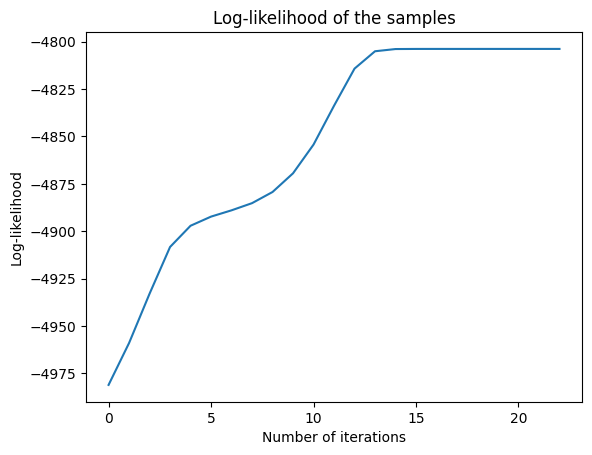

In [285]:
# Plot of the log-likelihood
plt.plot(logL)
plt.xlabel('Number of iterations')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood of the samples')
plt.show()

As expected, we can see on the plot that the log-likelihood do increase at each iteration of the algorithm, very distinctly at first and then more slowly. <br>

### **Question 4 :** *Are the estimated parameters far from the original ones ?*

In [286]:
# Realigning the clusters index between the estimated and the true parameters for comparison

index0 = np.argmin(np.linalg.norm(mu_estimated - mu[0], axis=1))
index1 = np.argmin(np.linalg.norm(mu_estimated - mu[1], axis=1))
index2 = np.argmin(np.linalg.norm(mu_estimated - mu[2], axis=1))

mu_estimated = mu_estimated[[index0, index1, index2]]
for i in range(len(mu_hist_estimated)):
    mu_hist_estimated[i] = mu_hist_estimated[i][[index0, index1, index2]]
sigma_estimated = sigma_estimated[[index0, index1, index2]]
for i in range(len(sigma_hist_estimated)):
    sigma_hist_estimated[i] = sigma_hist_estimated[i][[index0, index1, index2]]
alpha_estimated = alpha_estimated[[index0, index1, index2]]
for i in range(len(alpha_hist_estimated)):
    alpha_hist_estimated[i] = alpha_hist_estimated[i][[index0, index1, index2]]

We compare the estimated parameters with the original ones with respect to the $\ell_2$-norm for $\mu$ and $\alpha$, and to the Frobenius norm for $\Sigma$.
We observe that the estimated parameters are close to the original ones.

In [287]:
for i in range(m):
    print('Cluster {} :'.format(i))
    # print('mu_estimated = {}'.format(mu_estimated[i]))
    # print('mu = {}'.format(mu[i]))
    print("Error in mu: ", np.linalg.norm(mu_estimated[i] - mu[i]))
    # print('sigma_estimated = {}'.format(sigma_estimated[i]))
    # print('sigma = {}'.format(sigma[i]))
    print("Error in sigma: ", np.linalg.norm(sigma_estimated[i] - sigma[i], 'fro'))
    # print('alpha_estimated = {}'.format(alpha_estimated[i]))
    # print('alpha = {}'.format(prob_clusters[i]))
    print("Error in cluster distribution: ", np.linalg.norm(alpha_estimated[i] - prob_clusters[i]))
    print('')
    

Cluster 0 :
Error in mu:  0.08411827587101477
Error in sigma:  0.13174031950456516
Error in cluster distribution:  0.013554592320925471

Cluster 1 :
Error in mu:  0.06388263901678483
Error in sigma:  0.3280430750388992
Error in cluster distribution:  0.006792700079459868

Cluster 2 :
Error in mu:  0.19811881552928584
Error in sigma:  0.48548817429668073
Error in cluster distribution:  0.02034729240038538



Iteration 0


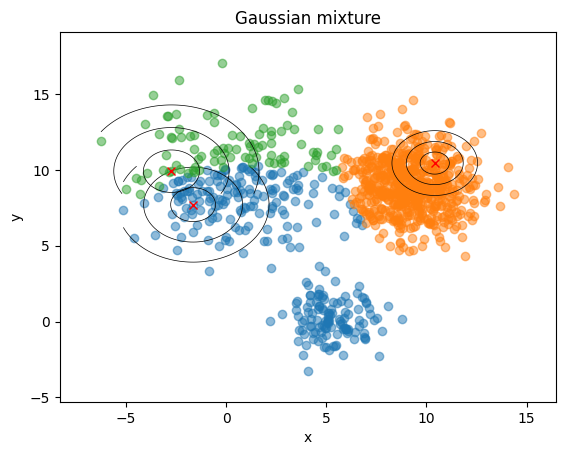

Iteration 1


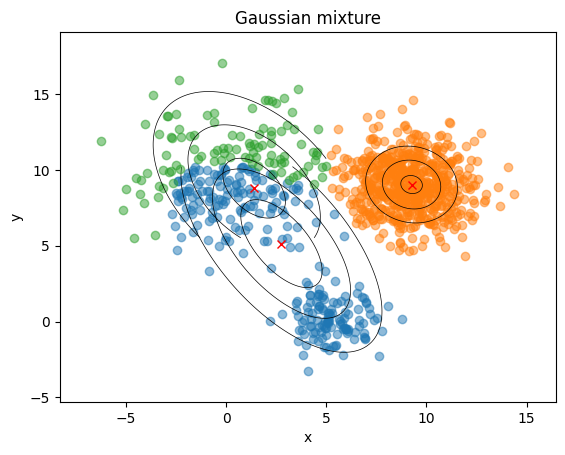

Iteration 2


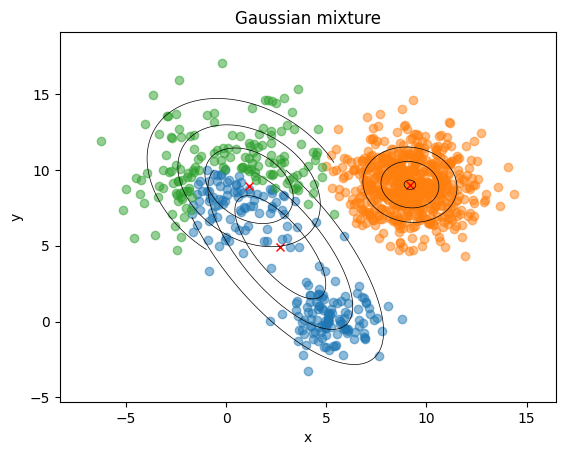

Iteration 5


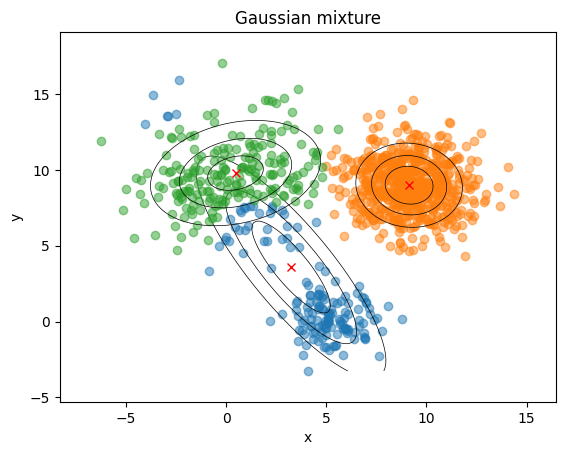

Iteration 10


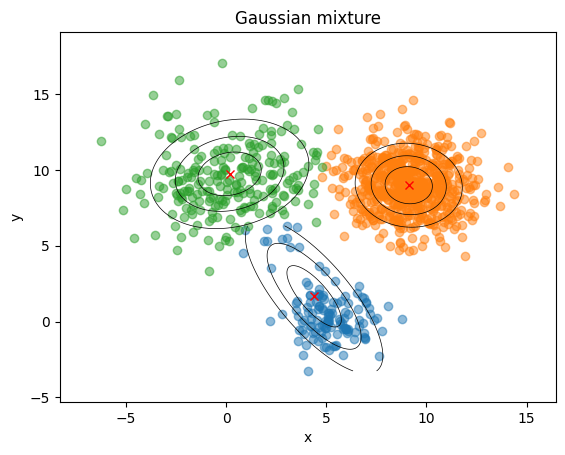

Iteration 23


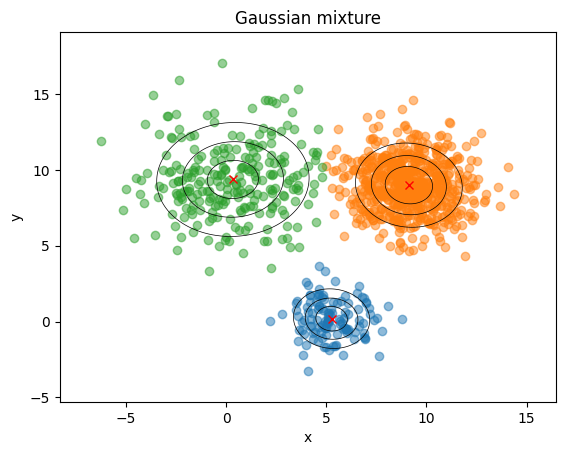

Ground truth


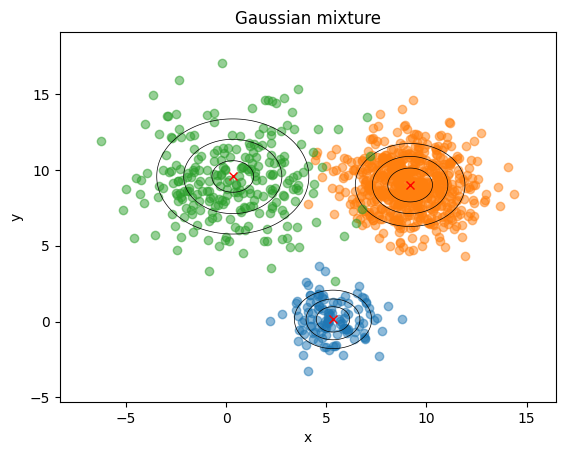

In [288]:
iterations = len(logL)
steps = [0, 1, 2, 5, 10, iterations]

for i in steps:
    print('Iteration {}'.format(i))
    assigned_clusters_temp = np.argmax(expectation_step(samples, mu_hist_estimated[i], sigma_hist_estimated[i], alpha_hist_estimated[i]), axis=1)
    plot_gaussian(samples, assigned_clusters_temp, mu_hist_estimated[i], sigma_hist_estimated[i], contours=True)
print('Ground truth')
plot_gaussian(samples, assigned_clusters, mu, sigma, contours=True)


Over the iterations, we observe the convergence of the algorithm. The final results are close to the original parameters, and the reconstruction of the data is very satisfying.

### **Question 5 :** *Application: Download the data Crude Birth/Death Rate and plot the associated scatter graph. What do you think about using a Gaussian mixture model?*

In [59]:
import pandas as pd

In [60]:
df = pd.read_csv("WPP2019_Period_Indicators_Medium.csv")
columns = ["CBR", "CDR"]
df = df[columns]
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CBR     13290 non-null  float64
 1   CDR     13290 non-null  float64
dtypes: float64(2)
memory usage: 233.6 KB
None
CBR    1650
CDR    1650
dtype: int64


In [61]:
df = df.dropna()

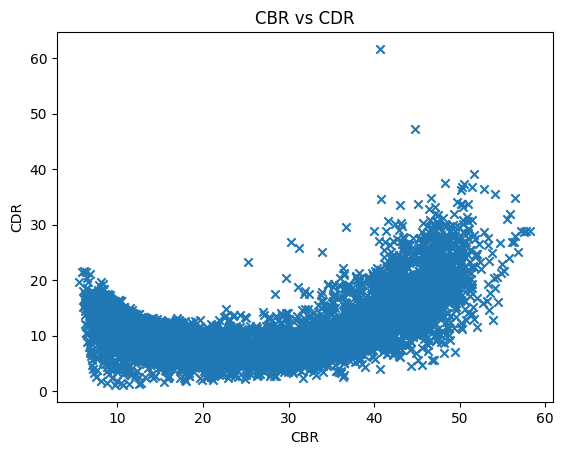

In [37]:
plt.scatter(df["CBR"], df["CDR"], marker="x")
plt.xlabel("CBR")
plt.ylabel("CDR")
plt.title("CBR vs CDR")
plt.show()

The CBR is determined by taking the number of births in one year in a country, dividing it by the country's population, and multiplying the number by 1,000. For example, a CBR of $x$ babies means that $x$ babies are born per 1,000 people per year (same reasoning for CDR). <br>
Therefore, analyzing the CBR and CDR of a country gives us information about the population growth of this country as well as its economic and social development. Indeed, we can distinguish different types of countries. For example:
- countries with a high CBR and a high CDR: these countries are usually underdeveloped, with a high mortality rate and a high birth rate. The population growth is low.
- countries with a low CBR and a low CDR: these countries are usually developed, with a low mortality rate and a low birth rate. The population growth is stable.
- countries with a low CBR and a high CDR: these countries are experiencing a demographic transition with a population decline.

The fact that we can distinguish different types of countries with the CBR and CDR suggests that these variables might not be independent, and that they may be be explained by a latent variable (such as the development of the country). <br>
We can then expect that the data will be rather well represented by a Gaussian Mixture Model.

### **Question 6 :** *Estimate the parameters $\theta$ for different values of m, try to interpret them and compute the BIC. Plot the corresponding p.d.f over the scatter plot.*

Let $m$ be the number of clusters for a Gaussian Mixture Model in $\mathbb{R}^d$. The degrees of freedom are:
- $m-1$ for the $\alpha_j$ (subject to the constraint $\sum_{j=1}^m \alpha_j = 1$),
- $d\times m$ for the $\mu_j$,
- $m \times \frac{d(d+1)}{2}$ for the $\Sigma_j$ (symmetric matrix). <br>

In total, we have $m-1 + d\times m + m \times \frac{d(d+1)}{2}$ degrees of freedom. <br>
With $d=2$, this sums up to $m-1 + 2m + m \times 3 = 4m-1$ degrees of freedom. <br>

In [44]:
def BIC(ll, m, X):
    """
    Returns the Bayesian Information Criterion for a given log-likelihood, number of clusters and number of samples.
    Parameters
    ----------
    ll : The log-likelihood.
    m : The number of clusters.
    n : The number of samples.
    """
    d = X.shape[1]
    n = X.shape[0]
    df = m * (d + d *(d+1)/2 + 1) - 1
    return -ll + 0.5 * df * np.log(n)

m = 2
Early stopping after 70 iterations


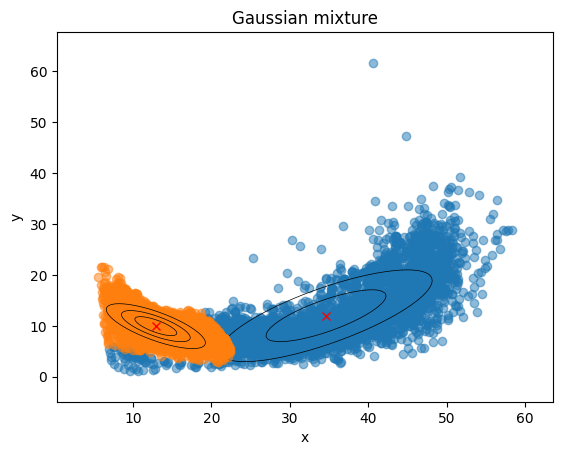

BIC = 79752.6178721368

m = 3
Early stopping after 108 iterations


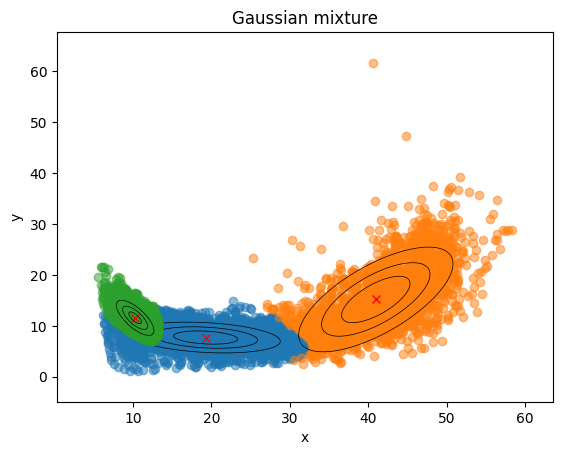

BIC = 76737.9038210716

m = 4
Early stopping after 204 iterations


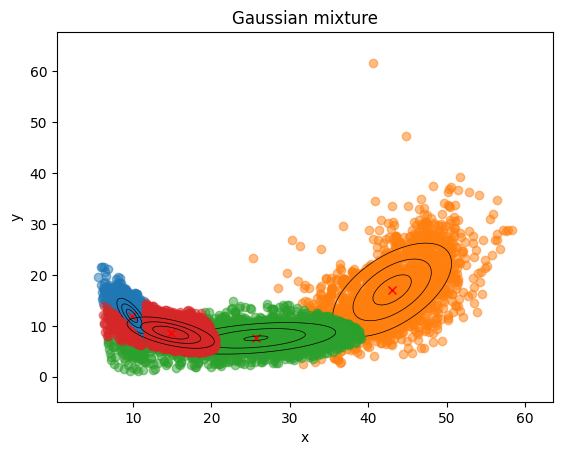

BIC = 76011.19531196936

m = 5
Early stopping after 424 iterations


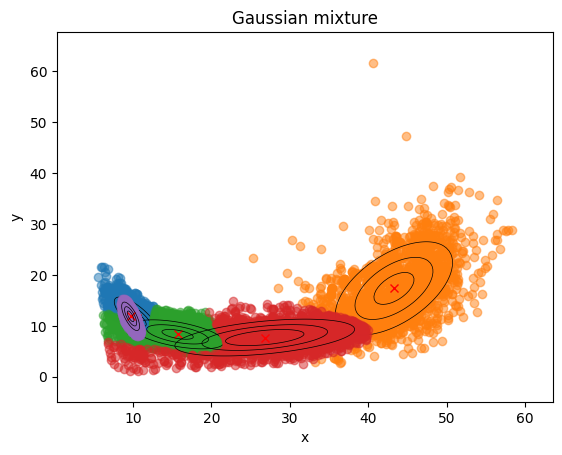

BIC = 75929.43032898165

m = 6
Early stopping after 352 iterations


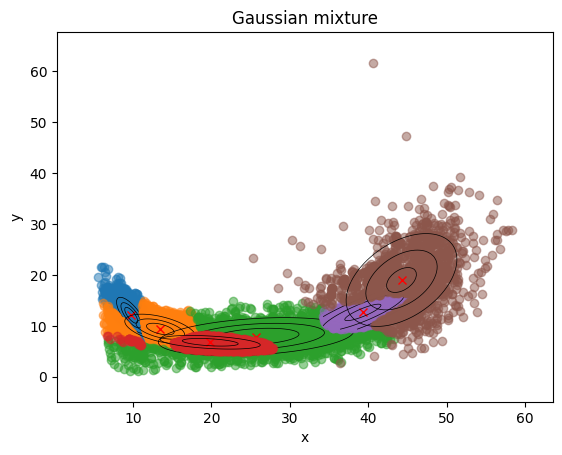

BIC = 75730.91252805422



In [50]:
np.random.seed(42)
bic_scores =[]

for m in range(2,7):
    print('m = {}'.format(m))
    (mu_estimated, sigma_estimated, alpha_estimated, logL, 
     mu_hist_estimated, sigma_hist_estimated, alpha_hist_estimated) = gaussian_em(df.values, m, err=1e-5)
    plot_gaussian(df.values, np.argmax(expectation_step(df.values, mu_estimated, sigma_estimated, alpha_estimated), axis=1), mu_estimated, sigma_estimated, contours=True)
    bic_scores.append(BIC(logL[-1], m, df.shape[0]))
    print('BIC = {}'.format(BIC(logL[-1], m, df.shape[0])))
    print('')

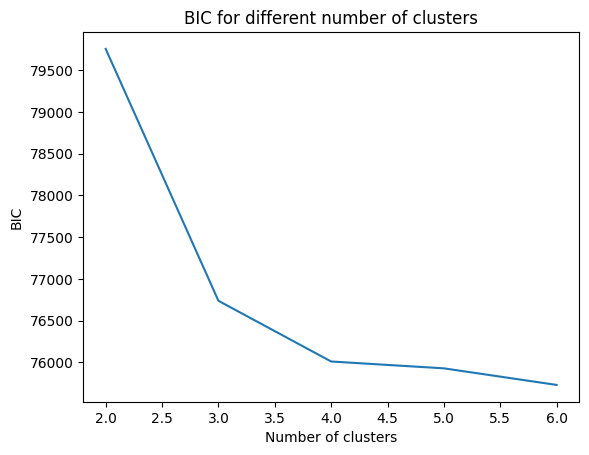

In [51]:
plt.plot(range(2,7), bic_scores)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC for different number of clusters')
plt.show()

Using the BIC as penalty for regularisation, the optimal number of clusters is $m = 6$. <br>
(If time, need to rerun the experiment with a larger maximum clusters since we don't know if it has converged). <br>
According to the expectations described in the previous question, we can interpret the clusters as representing different types of countries, with ranging levels of development. <br>

## Exercise 3: Importance Sampling

## A. Poor Importance Sampling

### **Question 1 :** *Implement a simple importance sampling procedure for the previous functions. Be careful when sampling from q supported on $\mathbb{R}$ to discard any samples $x < 0$ when p is supported only for $x > 0$.*

In [289]:
def p(x):
    assert np.all(x >= 0), 'x must be positive'
    return (x**(.65)) * np.exp(- (x**2) / 2)

def q(x, mu, var):
    return 2 / np.sqrt(2 * np.pi * var) * np.exp(- .5 * (mu - x)**2 / var)
  
def f(x):
    assert np.all(x >= 0), 'x must be positive'
    return 2 * np.sin(np.pi * x /1.5)

In [290]:
# Parameters of q
mu = 0.8
var = 1.5

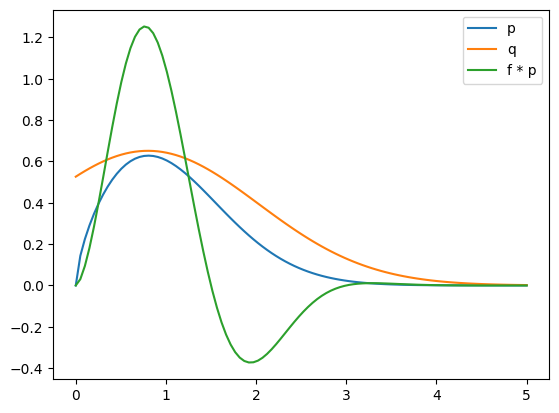

In [292]:
plt.plot(np.linspace(0, 5, 100), p(np.linspace(0, 5, 100)), label='p')
plt.plot(np.linspace(0, 5, 100), q(np.linspace(0, 5, 100), mu, var), label='q')
plt.plot(np.linspace(0, 5, 100), f(np.linspace(0, 5, 100))*p(np.linspace(0, 5, 100)), label='f * p')
plt.legend()
plt.show()

To perform importance sampling, we will approximate the expectation of $f$ with the following Monte Carlo estimator:
\begin{align*}
\mathbb{E}_p[f(X)] = \int_{\mathbb{R}} f(x) p(x) dx \approx \frac{1}{N} \sum_{i=1}^N f(x_i) \tilde{w}_i
\end{align*}
where $\tilde{w}_i = \frac{p(x_i)/q(x_i)}{\sum_{j=1}^N p(x_j)/q(x_j)}$ and the $x_i$ are i.i.d samples from $q$. <br>

In [293]:
def importance_sampling(N, f, p, q, mu, var):

    X = np.zeros(N)
    # Sampling from q (with normalization)
    for i in range(N):
        X[i] = np.random.normal(loc = mu, scale = var)
        while X[i] <= 0:
            X[i] = np.random.normal(loc = mu, scale = var)
    X = np.sort(X)

    # Computing the weights
    W = p(X) / q(X, mu, var)
    W /= np.mean(W)

    # Computing the expectation
    estimated_mean = np.mean(W * f(X))
    estimated_variance = np.var(W * f(X))

    return estimated_mean, estimated_variance, W, X
        

### **Question 2 :** *Compute the mean and the variance of the importance sampling estimate of $\mathbb{E}_p[f(X)]$. You can use several sample sizes, for instance $N = 10, 100, 10^3$ and $10^4$.*

N = 10
Estimated mean = 0.467422748151909
Estimated variance = 2.128813846701754

N = 100
Estimated mean = 0.8750695047588425
Estimated variance = 1.8390695083892568

N = 1000
Estimated mean = 0.6782897092914804
Estimated variance = 2.385557786122141

N = 10000
Estimated mean = 0.6908152513916238
Estimated variance = 2.296255452151163



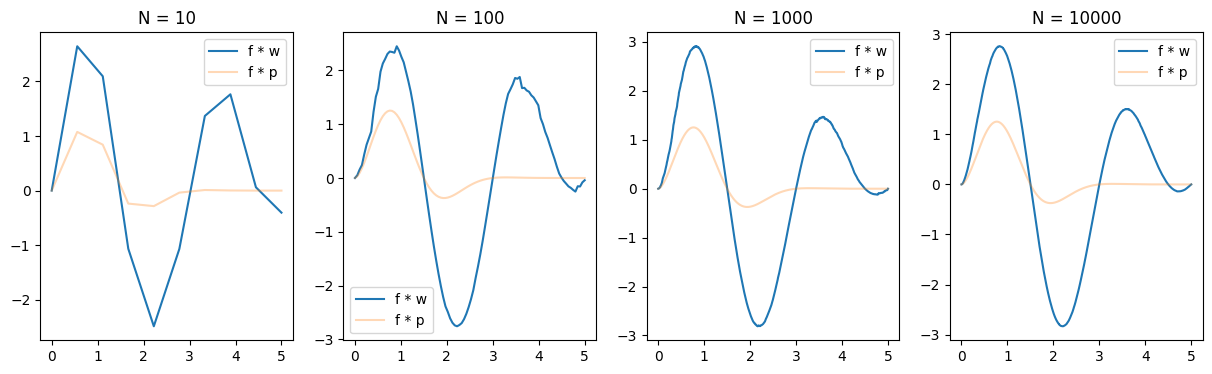

In [296]:
np.random.seed(42)

N = [10, 100, 1000, 10000]
estimated_means = []
estimated_vars = []

fig, ax = plt.subplots(1, len(N), figsize=(15, 4))

for i, n in enumerate(N):
    print('N = {}'.format(n))
    estimated_mean, estimated_var, weights, X = importance_sampling(n, f, p, q, mu, var)
    estimated_means.append(estimated_mean)
    estimated_vars.append(estimated_var)
    print('Estimated mean = {}'.format(estimated_mean))
    print('Estimated variance = {}'.format(estimated_var))
    print('')
    ax[i].plot(np.linspace(0, 5, n), weights*f(np.linspace(0, 5, n)), label='f * w')
    ax[i].plot(np.linspace(0, 5, n), f(np.linspace(0, 5, n))*p(np.linspace(0, 5, n)), label='f * p', alpha = 0.3)
    ax[i].legend()
    ax[i].set_title('N = {}'.format(n))
plt.show()

We notice that both the reconstruction with importance and the original one seem centered around the same value. However, the variance of the reconstruction with importance is much higher than the variance of the original one. <br>

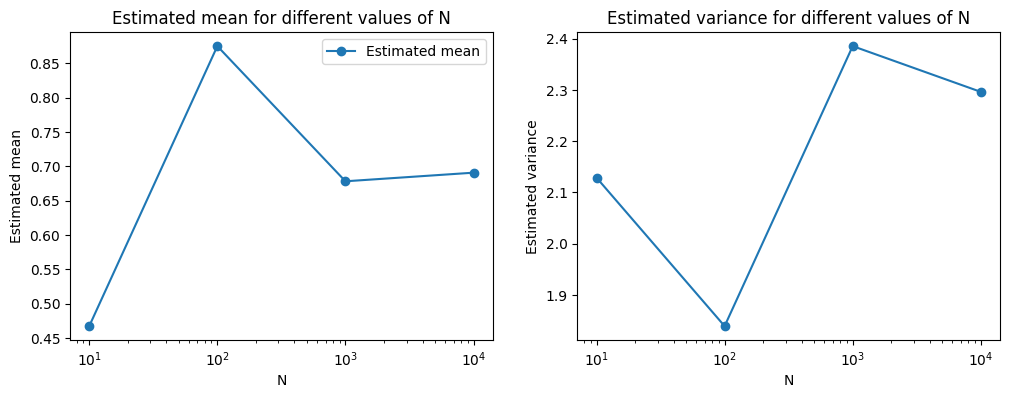

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].semilogx(N, estimated_means, marker='o', label='Estimated mean')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Estimated mean')
ax[0].set_title('Estimated mean for different values of N')
ax[0].legend()
ax[1].semilogx(N, estimated_vars, marker='o')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Estimated variance')
ax[1].set_title('Estimated variance for different values of N')
plt.show()

### **Question 3 :** *Shift the mean of $q, \mu = 6$, so that the centers of mass for each distribution are far apart and repeat the experiment. Compare the importance weights for both values of $\mu$.*

In [298]:
# Parameters of q shifted
mu = 6
var = 1.5

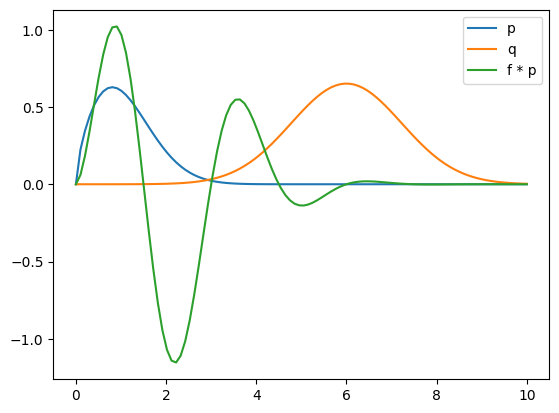

In [299]:
plt.plot(np.linspace(0, 10, 100), p(np.linspace(0, 10, 100)), label='p')
plt.plot(np.linspace(0, 10, 100), q(np.linspace(0, 10, 100), mu, var), label='q')
plt.plot(np.linspace(0, 10, 100), f(np.linspace(0, 10, 100))*p(np.linspace(0, 5, 100)), label='f * p')
plt.legend()
plt.show()

N = 10
Estimated mean = -1.8087079533373505
Estimated variance = 19.6714871019065

N = 100
Estimated mean = -1.7784229227056434
Estimated variance = 318.7920684793215

N = 1000
Estimated mean = 0.8175767723572315
Estimated variance = 1117.2109410177559

N = 10000
Estimated mean = 0.9347970340720431
Estimated variance = 2138.945532576844



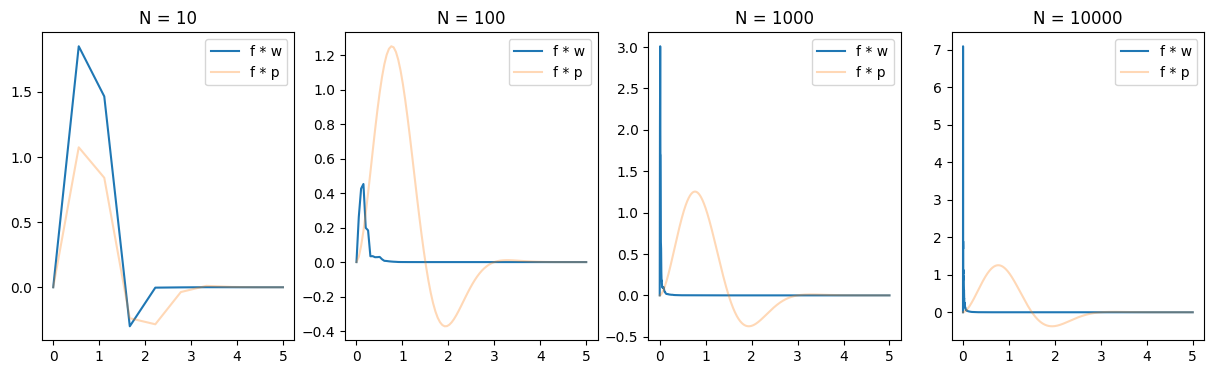

In [300]:
np.random.seed(42)

N = [10, 100, 1000, 10000]
estimated_means = []
estimated_vars = []

fig, ax = plt.subplots(1, len(N), figsize=(15, 4))

for i, n in enumerate(N):
    print('N = {}'.format(n))
    estimated_mean, estimated_var, weights, X = importance_sampling(n, f, p, q, mu, var)
    estimated_means.append(estimated_mean)
    estimated_vars.append(estimated_var)
    print('Estimated mean = {}'.format(estimated_mean))
    print('Estimated variance = {}'.format(estimated_var))
    print('')
    ax[i].plot(np.linspace(0, 5, n), weights*f(np.linspace(0, 5, n)), label='f * w')
    ax[i].plot(np.linspace(0, 5, n), f(np.linspace(0, 5, n))*p(np.linspace(0, 5, n)), label='f * p', alpha = 0.3)
    ax[i].legend()
    ax[i].set_title('N = {}'.format(n))
plt.show()

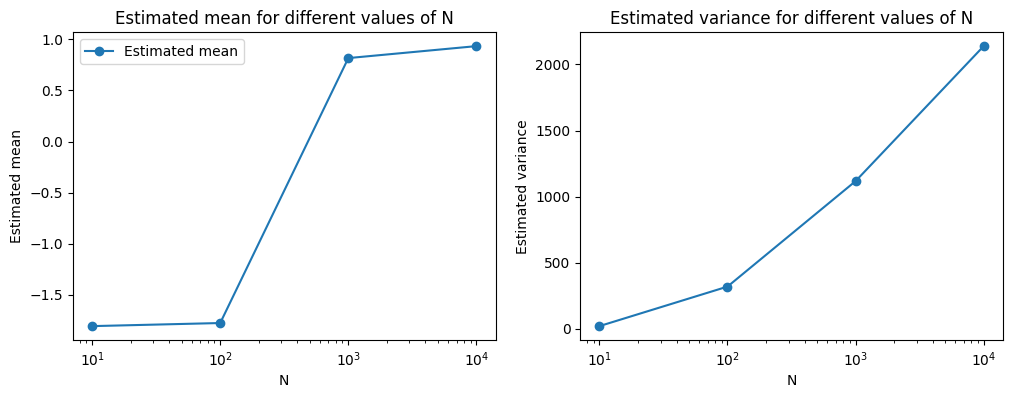

In [301]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].semilogx(N, estimated_means, marker='o', label='Estimated mean')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Estimated mean')
ax[0].set_title('Estimated mean for different values of N')
ax[0].legend()
ax[1].semilogx(N, estimated_vars, marker='o')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Estimated variance')
ax[1].set_title('Estimated variance for different values of N')
plt.show()

We notice here that the variance completely explodes when the centers of mass are far apart. This is due to the fact that the importance weights are very high for some samples, and very low for others. <br>

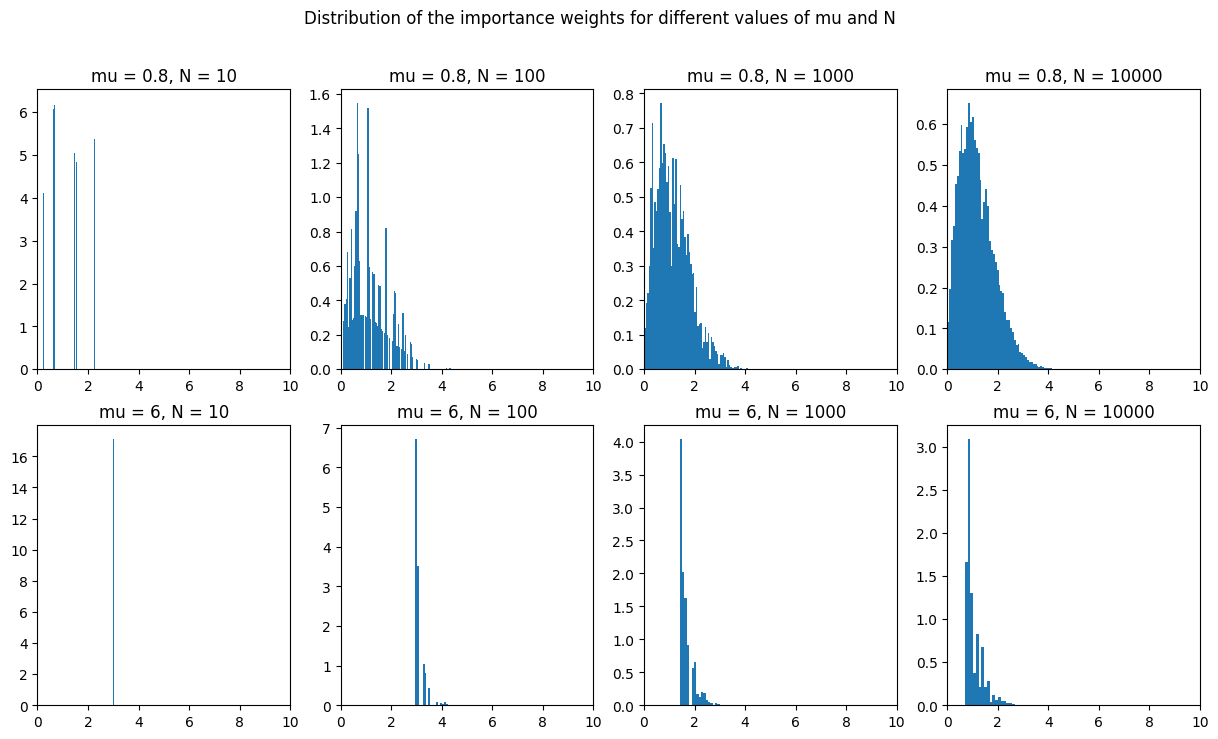

In [302]:
mu_s = [0.8, 6]
N = [10, 100, 1000, 10000]

fig, ax = plt.subplots(len(mu_s), len(N), figsize=(15, 8))

for i, mu in enumerate(mu_s):
    for j, n in enumerate(N):
        estimated_mean, estimated_var, weights, X = importance_sampling(n, f, p, q, mu, var)
        ax[i,j].hist(X, weights=weights, bins=100, density=True)
        ax[i,j].set_xlim(0, 10)
        ax[i,j].set_title('mu = {}, N = {}'.format(mu, n))
fig.suptitle('Distribution of the importance weights for different values of mu and N')
plt.show()

Firstly, we observe that for $\mu = 0.8$, the importance weights tend to be homogeneously distributed as $N$ increases. The two distributions are very close to each other for this mean, and since the importance weights are given by the ratio of the two densities, we don't observe any peak in the distribution of the importance weights. <br>
On the other hand, for $\mu = 6$, the importance weights are very high for samples close to the center of mass of $p$ and very low for samples close to the center of mass of $q$. This disjunction of the distributions over their support lead to a very high variance of the importance weights. <br>

Explain how the EM algorithm can be used to maximize the empirical criterion in step (iii) of the algorithm on page 6. Derive the parameters update.

## B. Adaptative Importance Sampling

### **Question 4 :** *Explain how the EM algorithm can be used to maximize the empirical criterion in step (iii) of the algorithm on page 6. Derive the parameters update.*

Let be $\theta$ the parameters such that $$ \theta = (\alpha_1, \dots, \alpha_m, \mu_1, \dots, \mu_m, \Sigma_1, \dots, \Sigma_m) $$.
Considering a sample of $n$ i.i.d observations $(X_i)_{i\in\{1,\dots,n\}}$, we recall that the log-likelihood in the case of a Gaussian Mixture Model is given by:
\begin{align*}
\ell(x_1,...,x_n;θ) = \sum_{i=1}^n \log \left( \sum_{j=1}^m \alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j) \right)
\end{align*}

Let $\mathcal{Q}$ be the family of Gaussian Mixture Models with $M$ components on $\mathbb{R}^d$:
\begin{align*}
q \in \mathcal{Q} \iff q(x) = \sum_{j=1}^M \alpha_j \mathcal{N}(x; \mu_j, \Sigma_j), ~~\text{ such that } 
\begin{cases}
\sum_{j=1}^M \alpha_j = 1
\alpha_j \geq 0, ~ \forall j \in \{1, \dots, M\} \\
\Sigma_j \succ 0, ~ \forall j \in \{1, \dots, M\} \\
\mu_j \in \mathbb{R}^d, ~ \forall j \in \{1, \dots, M\}
\end{cases}
\end{align*}

We consider the optimization problem consisting in approximating the distribution $\nu$:
\begin{align*}
q^* = \underset{q \in \mathcal{Q}}{\argmin} ~KL (\nu || q) \iff & \theta^* = \underset{\theta}{\argmax} \int \log(q(x)) \nu(x) dx \\
\iff & \theta^* = \underset{\theta}{\argmax} \int \log \left( \sum_{j=1}^M \alpha_j \mathcal{N}(x; \mu_j, \Sigma_j) \right) \nu(x) dx \\
\iff & \theta^* = \underset{\theta}{\argmax} ~\mathbb{E}_X \left[ \log \left( \sum_{j=1}^M \alpha_j \mathcal{N}(X; \mu_j, \Sigma_j) \right) \nu(X)\right] \\
\end{align*}
We recognize the same form as the log-likelihood expressed above, with an integral in terms of the sum over the instances.<br>
Let $q(X) = \sum_{j=1}^M \alpha_j \mathcal{N}(x; \mu_j, \Sigma_j)$. We can rewrite the previous optimization problem as:
\begin{align*}
\theta^* = \underset{\theta}{\argmax} ~\mathbb{E}_{q(X)} \left[ \log(q(x)) \frac{\nu(x)}{q(x)} \right]
\end{align*}
This formulation can then be linked to importance sampling, where $q$ is the importance density and $\frac{\nu(x)}{q(x)}$ is the importance weight. <br>

We now consider the Population Monte Carlo algorithm. <br>
Let $q^{(t)}$ be the importance density at iteration $t$ of the algorithm. <br>
The parameter update (step $(iii)$) can be written as the following optimization problem:
\begin{align*}
\theta^{(t+1)} = \underset{\theta}{\argmax} \sum_{i=1}^n \log \left( \sum_{j=1}^M \alpha_j \mathcal{N}(x_i; \mu_j, \Sigma_j) \right) \frac{\nu(x_i)}{q^{(t)}(x_i)}
\end{align*}
After renormalizing the weights, we obtain:
\begin{align*}
\theta^{(t+1)} &= \underset{\theta}{\argmax} \sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \log \left( \sum_{j=1}^M \alpha_j \mathcal{N}(x_i^{(t)}; \mu_j, \Sigma_j) \right)  \\
&= \underset{\theta}{\argmax} ~\mathbb{E}_X \left[ \tilde{\omega_i}^{(t)}(X) \log(q_{\theta}^{(t)}(X)) \right]
\end{align*}
Considering that:
\begin{align*}
\log q_{\theta}(x) = \log \left( \sum_{j=1}^M \alpha_j \mathcal{N}(x; \mu_j, \Sigma_j) \right) = \log \mathbb{E}_{Z|X=x,\theta} \left[ \mathcal{N}(x; \mu_Z, \Sigma_Z) \alpha_Z \right] = \log \mathbb{E}_{Z|X=x,\theta} \left[q_{\theta}(x,Z)\right], 
\end{align*}
we can write the following optimization problem:
\begin{align*}
\theta^{(t+1)} & = \underset{\theta}{\argmax} ~\mathbb{E}_X \left[ \tilde{\omega_i}^{(t)}(X) \log \left(\mathbb{E}_{Z|X=x,\theta} \left[q_{\theta}(x,Z) \right] \right) \right] \\
\iff \theta^{(t+1)} & = \underset{\theta}{\argmax} ~\mathbb{E}_X \left[ \tilde{\omega_i}^{(t)}(X) \mathbb{E}_{Z|X=x,\theta} \left[ \log \left( q_{\theta}(x,Z) \right) \right] \right] \\
\end{align*}
Therefore, we find the expression of the expectation of the complete log-likelihood with respect to the conditional distribution of $Z$ given $X$ that we obtain at the end of the E-step, with however an additional weight $\tilde{\omega_i}^{(t)}(X)$ and an additional expectation with respect $X$.

We update the parameters $\theta$ as detailed in the M-step of the EM algorithm for Gaussian Mixture Models with this additional the weight factor $\tilde{\omega_i}^{(t)}(X)$ coming from the importance sampling procedure:
\begin{align*}
\begin{cases}
\tau_i^j(\theta^{t}) = \frac{\alpha_j^{(t)} \mathcal{N}(x_i; \mu_j^{(t)}, \Sigma_j^{(t)})}{\sum_{k=1}^M \alpha_k^{(t)} \mathcal{N}(x_i; \mu_k^{(t)}, \Sigma_k^{(t)})} \\ \\
\alpha_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}{\sum_{j=1}^M \sum_{i=1}^n  \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}  \\ \\
\mu_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j x_i}{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j} \\ \\
\Sigma_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j (x_i - \mu_j^{(t+1)}) (x_i - \mu_j^{(t+1)})^T}{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}
\end{cases}
\end{align*}


### **Question 5 :** *Using the Adaptive Importance Sampling, write an algorithm which allows drawing samples from the density $\nu$. You may display the results for the banana-shaped density in the first two coordinates.*

In [303]:
def banana_shaped(N, d, mu, sigma, b):
    """
    Returns the banana-shaped distribution.
    Parameters
    ----------
    N : The number of samples to generate.
    d : The dimension of the samples.
    mu : The mean of the distribution.
    sigma : The covariance matrix of the distribution.
    b : The parameter of the distribution.
    """
    # Samples from a gaussian distribution
    X = np.random.multivariate_normal(mu, sigma, N)
    # Transformation
    X[:,1] += b * (X[:,0]**2 - sigma[0,0])

    return X

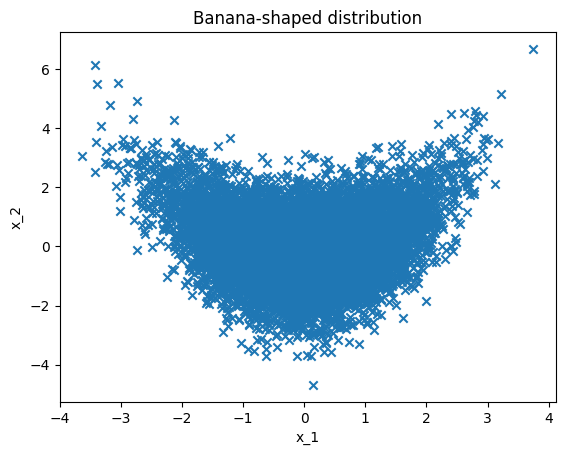

In [304]:
# Parameters
d = 2
mu = np.zeros(d)
sigma = np.eye(d)
b = .4

banana_samples = banana_shaped(10000, d, mu, sigma, b)

plt.scatter(banana_samples[:,0], banana_samples[:,1], marker='x', )
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Banana-shaped distribution')
plt.show()

In [305]:
def target_nu(x, mu, sigma, b):

    assert x.shape[1] >= 2, 'x must be 2-dimensional'
    x_temp = x.copy()
    x_temp[:,1] -= b * (np.power(x[:,0],2) - sigma[0,0])
    eps = 1e-5
    return 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma)) + eps) * np.exp(-.5 * np.sum((x_temp - mu) @ np.linalg.pinv(sigma) * (x_temp - mu), axis=1))



def importance(x, mu, sigma, alpha):

    m = alpha.shape[0]
    samples = np.zeros((x.shape[0], m))
    eps = 1e-5
    for i in range(m):
        samples[:, i] =  1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma[i])) + eps) * np.exp(-.5 * np.sum((x - mu[i]) 
                                                                                                  @ np.linalg.pinv(sigma[i]) * (x - mu[i]), axis=1))
        samples[:, i] *= alpha[i]
    samples = np.sum(samples, axis=1)
    return samples

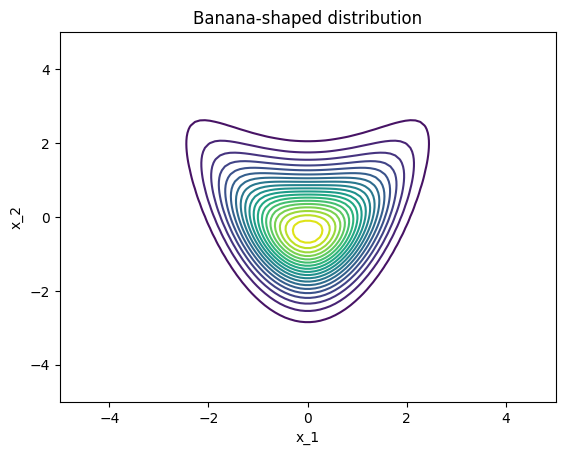

In [306]:
# TEST
d = 2
mu = np.zeros(d)
sigma = np.eye(d)
b = .4

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = target_nu(np.array([X.flatten(), Y.flatten()]).T, mu, sigma, b).reshape(X.shape)

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Banana-shaped distribution')
plt.show()

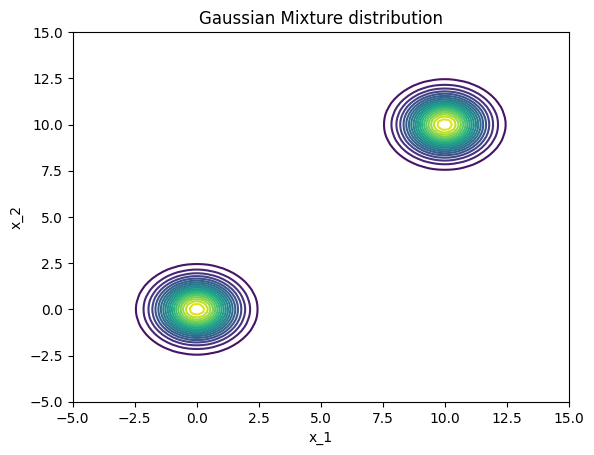

In [307]:
# TEST

X = np.linspace(-5, 15, 100)
Y = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(X, Y)
mu = np.array([[0, 0], [10, 10]])
sigma = np.array([np.eye(2), np.eye(2)])
alpha = np.ones(2)/2
Z = importance(np.array([X.flatten(), Y.flatten()]).T, mu, sigma, alpha).reshape(X.shape)

plt.contour(X, Y, Z, levels=20)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Gaussian Mixture distribution')
plt.show()
        

In [308]:
def adapt_importance_sampling(X, target, importance, mu_t, sigma_t, mu_imp, sigma_imp, alpha, b):
    eps = 1e-3
    p = target(X, mu_t, sigma_t, b)
    q = importance(X, mu_imp, sigma_imp, alpha)
    eps = 1e-5
    weights = p / (q+eps)
    weights /= (np.mean(weights))
    return weights

In [309]:
def expectation_step_PMC(X, mu_t, sigma_t, alpha_t):
    """
    Returns the soft-clustering for the samples X given the parameters mu_t, 
    sigma_t and the current distribution of the clusters.
    Parameters
    ----------
    X : The samples.
    mu_t : The current means of the gaussians.
    sigma_t : The current covariance matrices of the gaussians.
    alpha_t : The current distribution of the clusters.
    """
    # Number of samples
    N = X.shape[0]
    # Number of clusters
    m = len(mu_t)
    # Dimension of the samples
    dim = X.shape[1]

    eps = 1e-5
    
    tau = np.zeros((N, m))
    for i in range(m):
        tau[:, i] = np.log(alpha_t[i]) -.5 * (dim * np.log(2 * np.pi) + np.linalg.slogdet(sigma_t[i])[1] 
                                                + np.sum((X - mu_t[i]) @ np.linalg.pinv(sigma_t[i]) * (X - mu_t[i]), axis=1)) 
        tau[:, i] = np.exp(tau[:, i])
    
    tau /= (np.sum(tau, axis=1).reshape(-1, 1)+eps)
    assert np.isclose(np.sum(tau, axis=1).all(), 1)
    
    return tau

\begin{align*}
\begin{cases}
\tau_i^j(\theta^{t}) = \frac{\alpha_j^{(t)} \mathcal{N}(x_i; \mu_j^{(t)}, \Sigma_j^{(t)})}{\sum_{k=1}^M \alpha_k^{(t)} \mathcal{N}(x_i; \mu_k^{(t)}, \Sigma_k^{(t)})} \\ \\
\alpha_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}{\sum_{j=1}^M \sum_{i=1}^n  \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}  \\ \\
\mu_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j x_i}{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j} \\ \\
\Sigma_j^{(t+1)} = \frac{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j (x_i - \mu_j^{(t+1)}) (x_i - \mu_j^{(t+1)})^T}{\sum_{i=1}^n \tilde{\omega_i}^{(t)}(x_i) \tau_i^j}
\end{cases}
\end{align*}

In [310]:
def maximization_step_PMC(X, mu_t, sigma_t, tau, weights):
    """
    Returns the updated parameters of the gaussians given the samples X and the probabilities of the clusters.
    Parameters
    ----------
    X : The samples.
    mu_t : The current means of the gaussians.
    sigma_t : The current covariance matrices of the gaussians.
    tau : The soft-clustering of the samples.
    weights : The importance weights.
    """
    N = X.shape[0]
    m = tau.shape[1]
    mu = np.zeros((tau.shape[1], X.shape[1]))
    sigma = np.zeros((tau.shape[1], X.shape[1], X.shape[1]))
    alpha = np.zeros(tau.shape[1])
    eps = 1e-5

    for i in range(m):
        alpha[i] = np.sum(tau[:, i] * weights)
    
    for i in range(m):
        mu[i,:] = np.sum((tau[:, i] * weights).reshape(-1, 1) * X, axis=0) / (alpha[i]+eps)
        sigma[i] = np.sum((tau[:, i] * weights).reshape(-1, 1, 1) * (X - mu[i]).reshape(-1, 1, 2) * 
                          (X - mu[i]).reshape(-1, 2, 1), axis=0) / (alpha[i]+eps)

    alpha /= np.sum(alpha, axis=0)
    assert np.isclose(np.sum(alpha), 1)
    
    return mu, sigma, alpha

In [311]:
def draw_from_q(mu, sigma, alpha, dim, N):
    """
    Returns N samples drawn from a gaussian mixture law with m clusters.
    Parameters
    ----------
    mu : The means of the gaussians.
    sigma : The covariance matrices of the gaussians.
    alpha : The distribution of the clusters.
    dim : The dimension of the samples.
    N : The number of samples to generate.
    """
    # Number of clusters
    m = len(mu)
    alpha = alpha/np.sum(alpha)
    # Cluster sampling
    clusters = discrete_distribution(np.arange(m), alpha, N)
    # Generation of samples
    samples = np.zeros((N, dim))
    for i, cluster in enumerate(clusters):
        samples[i] = np.random.multivariate_normal(mu[int(cluster)], sigma[int(cluster)])
    return samples

In [312]:
# EM algorithm for PMC

def gaussian_em_PMC(N, dim, m_clusters, target_nu, importance_q, b, err=1e-5, max_iter=500):
    """
    Returns the parameters of the gaussian mixture law that maximizes the likelihood of the samples X.
    Parameters
    ----------
    N : The number of samples.
    dim : The dimension of the samples.
    m_clusters : The number of clusters.
    target_nu : The target distribution.
    importance_q : The importance distribution.
    b : The parameter used to distort the distribution target_nu.
    """
    # Initialization of the historical values
    logL = []
    mu_hist = []
    sigma_hist = []
    alpha_hist = []

    # Initialization of the parameters
    mu_target = np.zeros(dim)
    sigma_target = np.eye(dim)
    np.random.seed(12)
    Mu_imp = np.random.rand(m_clusters, dim)*2
    mu_hist.append(Mu_imp)
    Sigma_imp = np.array([np.eye(dim) for _ in range(m_clusters)])
    sigma_hist.append(Sigma_imp)
    alpha_imp = np.ones(m_clusters)/m_clusters
    alpha_hist.append(alpha_imp)

    # Iterations
    for i in tqdm.tqdm(range(max_iter)):
        # Expectation step
        X = draw_from_q(Mu_imp, Sigma_imp, alpha_imp, dim, N)
        weights = adapt_importance_sampling(X, target_nu, importance_q, mu_target, sigma_target, Mu_imp, Sigma_imp, alpha_imp, b)
        tau_t = expectation_step_PMC(X, Mu_imp, Sigma_imp, alpha_imp)
        # Maximization step
        mu_imp_t, sigma_imp_t, alpha_imp_t = maximization_step_PMC(X, Mu_imp, Sigma_imp, tau_t, weights)
        #  Historical values
        logL.append(logLikehood(X, mu_imp_t, sigma_imp_t, tau_t, alpha_imp_t))
        mu_hist.append(mu_imp_t)
        sigma_hist.append(sigma_imp_t)
        alpha_hist.append(alpha_imp_t)
        # Early stopping
        if len(logL) > 1 and np.abs(logL[-1] - logL[-2]) < err:
            print('Early stopping after {} iterations'.format(i))
            break
        # Update
        Mu_imp = mu_imp_t
        Sigma_imp = sigma_imp_t
        alpha_imp = alpha_imp_t

    return Mu_imp, Sigma_imp, alpha_imp, logL, mu_hist, sigma_hist, alpha_hist
        


In [313]:
np.random.seed(10)

# Parameters
N = 1000
dim = 2
m = 3
b = .4

(mu_imp, sigma_imp, alpha_imp, logL,
    mu_hist_imp, sigma_hist_imp, alpha_hist_imp) = gaussian_em_PMC(N, dim, m, target_nu, importance, b, err=1e-5)

100%|██████████| 500/500 [00:42<00:00, 11.87it/s]


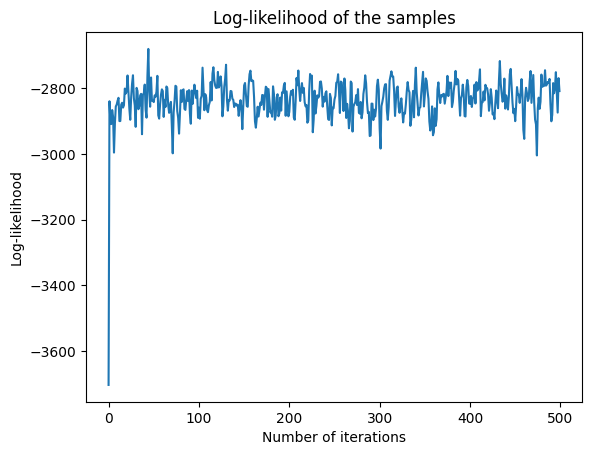

In [314]:
# Plot of the log-likelihood
plt.plot(logL)
plt.xlabel('Number of iterations')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood of the samples')
plt.show()

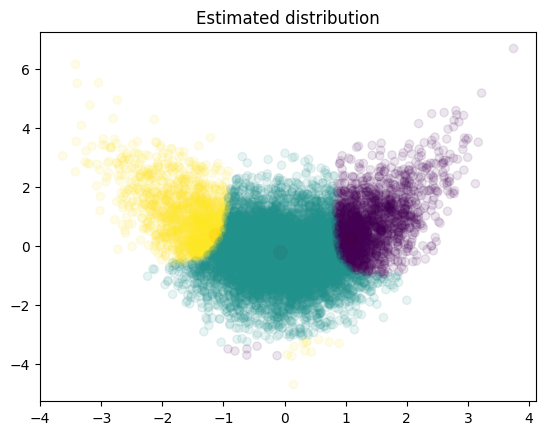

In [315]:
# Plot of the estimated distribution
plt.scatter(mu_imp[:,0], mu_imp[:,1], c='red', s=100, alpha=1)
plt.scatter(banana_samples[:,0], banana_samples[:,1], c=np.argmax(expectation_step_PMC(banana_samples, mu_imp, sigma_imp, alpha_imp), axis=1), alpha=0.1)
plt.title('Estimated distribution')
plt.show()

Iteration 0


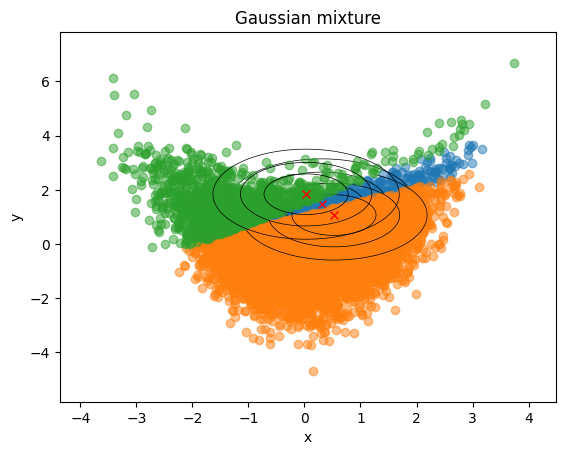

Iteration 1


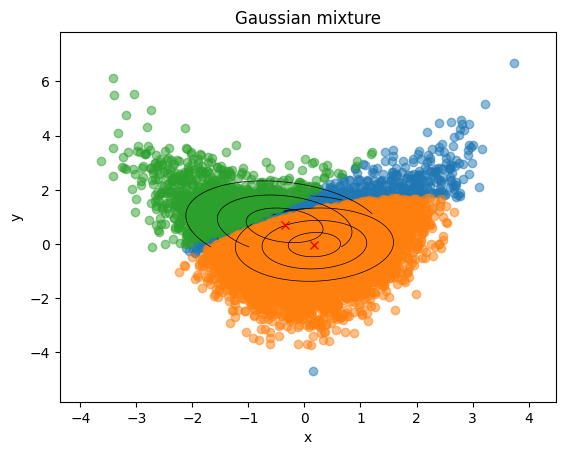

Iteration 2


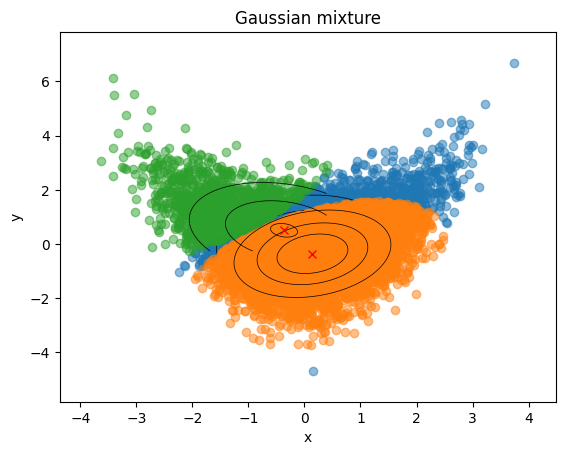

Iteration 5


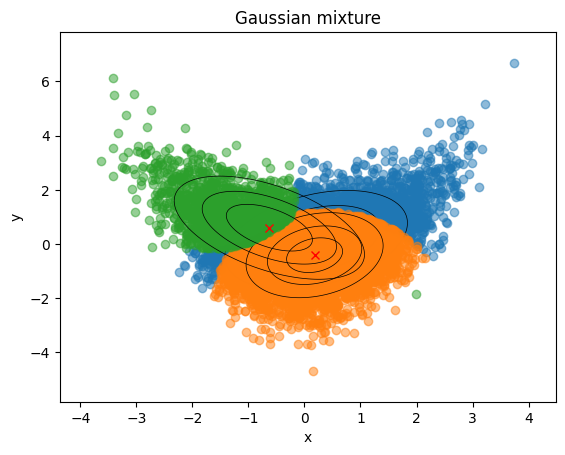

Iteration 10


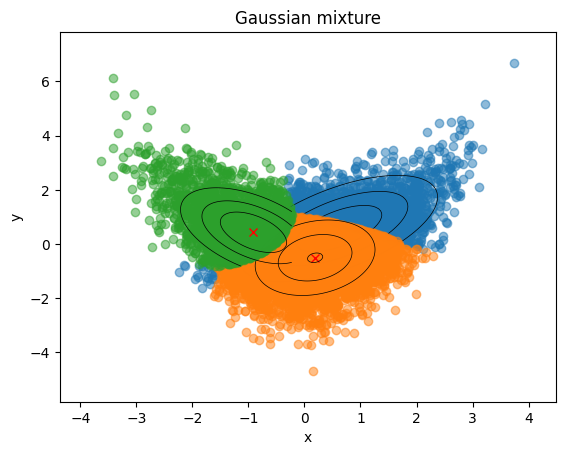

Iteration 500


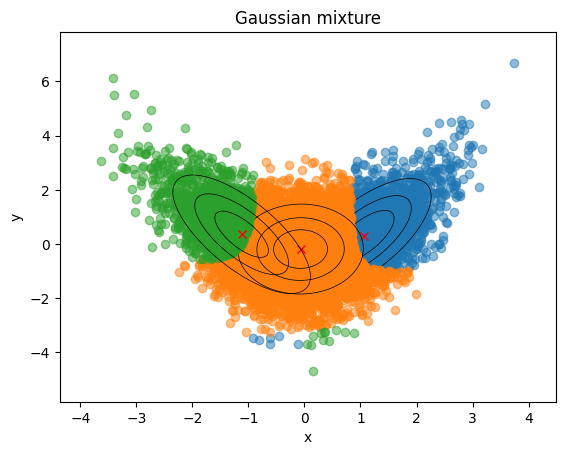

In [316]:
iterations = len(logL)
steps = [0, 1, 2, 5, 10, iterations]

for i in steps:
    print('Iteration {}'.format(i))
    assigned_clusters_temp = np.argmax(expectation_step_PMC(banana_samples, mu_hist_imp[i], sigma_hist_imp[i], alpha_hist_imp[i]), axis=1)
    plot_gaussian(banana_samples, assigned_clusters_temp, mu_hist_imp[i], sigma_hist_imp[i], contours=True)